In [51]:
import pandas as pd
import csv
import yfinance as yf
from yahoofinancials import YahooFinancials as YF
import yahoo_fin.stock_info as si
import numpy as np
import numpy_financial as npf
from jproperties import Properties
import matplotlib.pyplot as plt
# import some machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Import accuracy measure
from sklearn.metrics import r2_score
# Import cross validation
from sklearn.model_selection import cross_val_score

In [59]:
data = pd.read_csv('../stocks/AAPL.csv')
data_Y = data['CLOSE']

print(data.head())

predict_columns = ['DATE']

# Drop the 'CLOSE' column
data_X = data[predict_columns]
# Drop all NAN values
#data_X = data_X.dropna()

print(data_X.head())

         DATE     CLOSE      HIGH       LOW      OPEN     VOLUME  ADJCLOSE  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600  0.099319   
1  1980-12-15  0.121652  0.122210  0.121652  0.122210  175884800  0.094137   
2  1980-12-16  0.112723  0.113281  0.112723  0.113281  105728000  0.087228   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600  0.089387   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600  0.091978   

   EPS  PE  FYG  MOS  BUY_method  
0  NaN NaN  NaN  NaN         NaN  
1  NaN NaN  NaN  NaN         NaN  
2  NaN NaN  NaN  NaN         NaN  
3  NaN NaN  NaN  NaN         NaN  
4  NaN NaN  NaN  NaN         NaN  
      VOLUME  ADJCLOSE
0  469033600  0.099319
1  175884800  0.094137
2  105728000  0.087228
3   86441600  0.089387
4   73449600  0.091978


In [53]:
# Create train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.9, shuffle=True)


In [54]:
# Implement Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)



In [55]:
res = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

# Calculate the accuracies to a dataframe

res_acc = pd.DataFrame(['Model','acc','R2','CV','MSE'])
res_acc['Model'] = 'RF'

# Calculate the accuracy of the model respect to test set
acc = regressor.score(X_test, Y_test)
res_acc['acc'] = acc
res_acc['R2'] = r2_score(Y_test, Y_pred)
res_acc['MSE'] = mean_squared_error(Y_test, Y_pred)
res_acc['CV'] = cross_val_score(regressor, X_train, Y_train, cv=100).mean()


In [56]:
print(res_acc)

       0 Model       acc        R2          MSE        CV
0  Model    RF -0.038358 -0.038358  1837.023242 -0.191723
1    acc    RF -0.038358 -0.038358  1837.023242 -0.191723
2     R2    RF -0.038358 -0.038358  1837.023242 -0.191723
3     CV    RF -0.038358 -0.038358  1837.023242 -0.191723
4    MSE    RF -0.038358 -0.038358  1837.023242 -0.191723


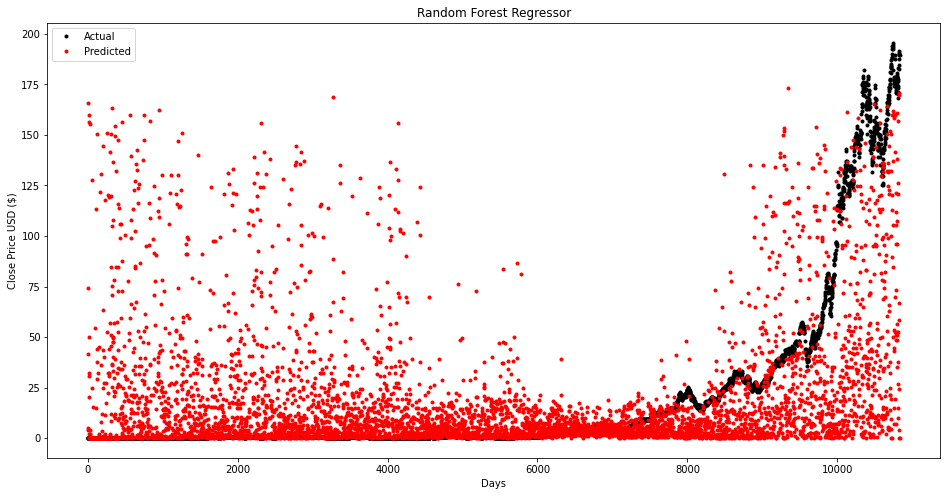

In [57]:
# Plot the model for test and actual data

plt.figure(figsize=(16,8))
plt.title('Random Forest Regressor')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(res['Actual'],'k.')
plt.plot(res['Predicted'],'r.')
plt.legend(['Actual','Predicted'])
plt.show()

In [58]:

print(res['Predicted'][-5:])

2444    18.443303
5436    13.622061
1993    10.135300
3098     0.397846
1758    99.249203
Name: Predicted, dtype: float64
